Part 1

In [ ]:
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate

    def activate(self, stimulus_strength):
        pass  

class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus):
        pass  

class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    def control_muscle(self):
        pass  

class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")

    def light_detection(self, intensity):
        pass  

class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        # Call the parent class constructor with "pressure" as receptor type
        super().__init__(firing_rate, receptor_type="pressure")

    def pressure_detection(self, pressure_level):
        # Placeholder for functionality specific to pressure detection
        pass

    def unique_response_to_pressure(self, pressure_level):
        # Triggers response to pressure.
        pass


class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        # Call the parent class constructor with "skeletal muscle" as target muscle
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def skeletal_muscle_control(self):
        # Placeholder for controlling skeletal muscles
        pass

    def unique_response_for_skeletal_muscle(self):
        # Placeholder for response mechanisms specific to skeletal muscles
        pass


class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        # Call the parent class constructor with "muscle spindle" as target muscle
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def muscle_spindle_control(self):
        # Placeholder for controlling muscle spindles
        pass

    def unique_response_for_muscle_spindle(self):
        # Placeholder for response mechanisms specific to muscle spindles
        pass


Part 2-Question 1

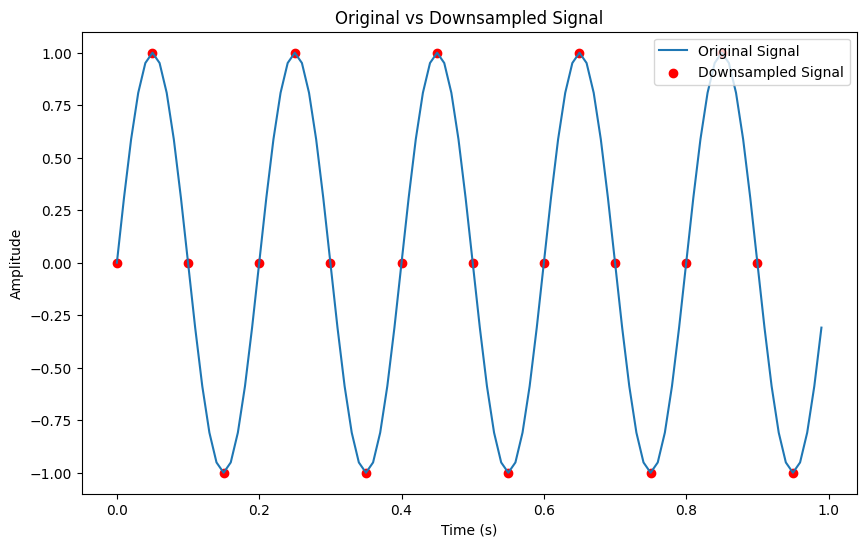

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def downsample_signal_with_pandas(signal, sampling_rate=5):
    """
    Downsample a sinusoidal signal using pandas while preserving maxima and minima.
    
    Args:
        signal (numpy.ndarray): The input sinusoidal signal.
        sampling_rate (int): Interval for regular downsampling.
    
    Returns:
        pandas.DataFrame: A DataFrame containing the downsampled signal and time indices.
    """
    # Create a Pandas DataFrame for the signal
    df = pd.DataFrame({"signal": signal})
    
    # Identify local maxima: where the signal is greater than its neighbors
    df['is_max'] = (df['signal'] > df['signal'].shift(1)) & (df['signal'] > df['signal'].shift(-1))
    
    # Identify local minima: where the signal is smaller than its neighbors
    df['is_min'] = (df['signal'] < df['signal'].shift(1)) & (df['signal'] < df['signal'].shift(-1))
    
    # Get the indices of maxima and minima
    important_indices = df[df['is_max'] | df['is_min']].index
    
    # Add regular sampling indices (e.g., every 5th point)
    regular_indices = np.arange(0, len(signal), sampling_rate)
    
    # Combine all unique indices (maxima, minima, and regular sampling)
    combined_indices = sorted(set(important_indices) | set(regular_indices))
    
    # Create a new DataFrame with only the downsampled signal
    downsampled_df = df.iloc[combined_indices].copy()
    downsampled_df['time'] = combined_indices  # Add time indices for plotting
    
    return downsampled_df

# Verification script to test the function
if __name__ == "__main__":
    #Generate a sinusoidal signal
    time = np.arange(0, 1, 0.01)  # Time vector (0 to 1 second, sampled every 0.01 seconds)
    frequency = 5  # Frequency in Hz
    original_signal = np.sin(2 * np.pi * frequency * time)  # 5Hz sinusoidal signal

    #Downsample the signal using the function
    downsampled_df = downsample_signal_with_pandas(original_signal)

    #Plot the original and downsampled signals
    plt.figure(figsize=(10, 6))  # Create a figure for the plot
    plt.plot(time, original_signal, label="Original Signal")  # Plot the original signal
    plt.scatter(downsampled_df['time'] * 0.01, downsampled_df['signal'], 
                color='red', label="Downsampled Signal")  # Plot the downsampled signal
    plt.title("Original vs Downsampled Signal")  # Add a title to the plot
    plt.xlabel("Time (s)")  # Label the x-axis
    plt.ylabel("Amplitude")  # Label the y-axis
    plt.legend()  # Add a legend to distinguish the signals
    plt.show()  # Display the plot



Question 2

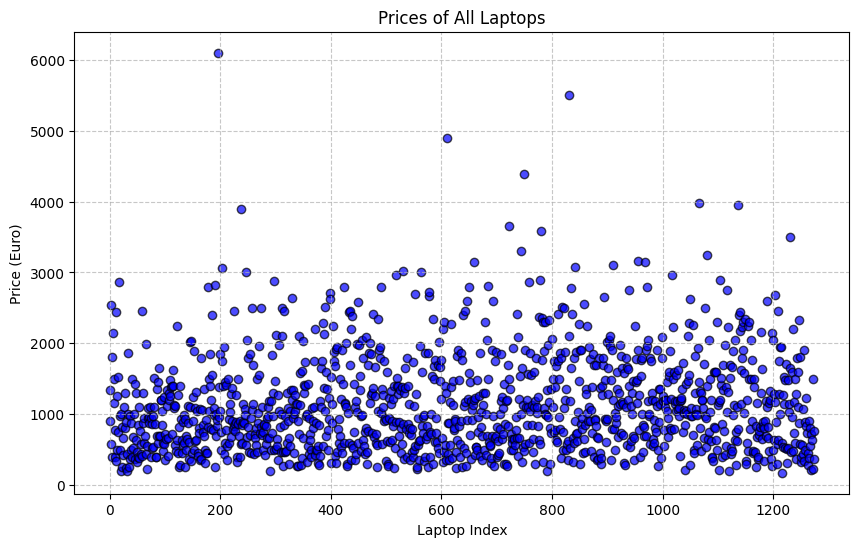

Company with the most expensive laptops on average: Razer
Average price per company:
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64
Unique Operating Systems:
['macos' 'no os' 'windows' 'mac os x' 'linux' 'android' 'windows 10 s'
 'chrome os' 'windows 7']


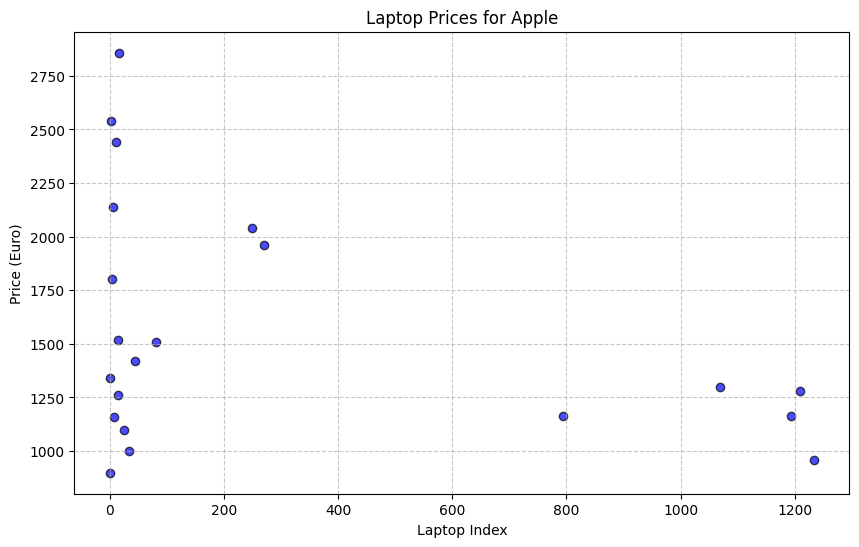

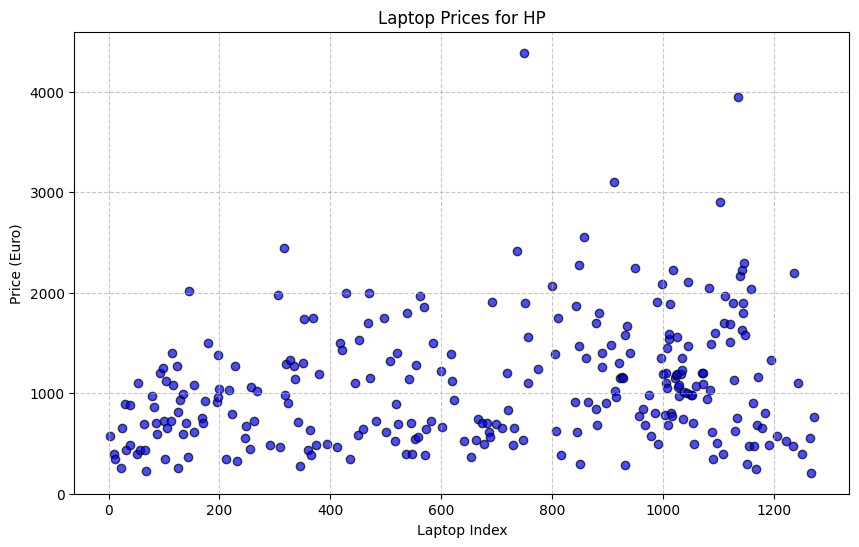

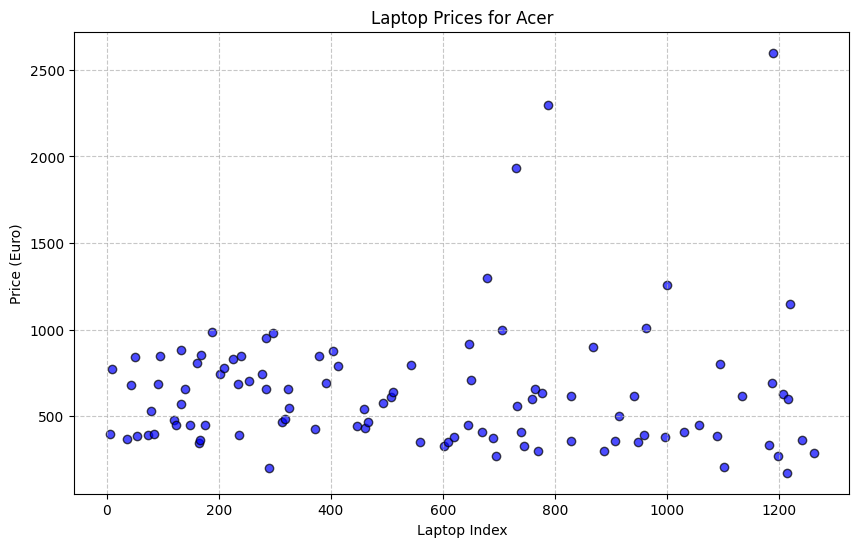

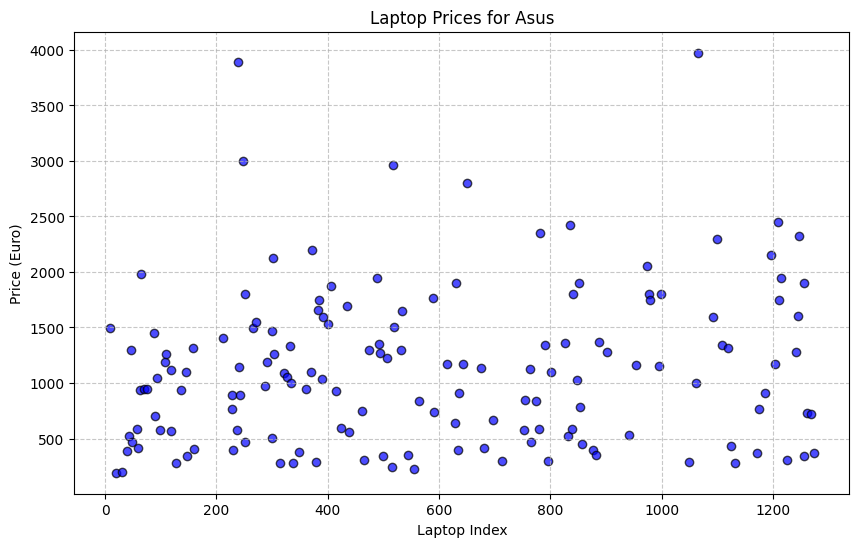

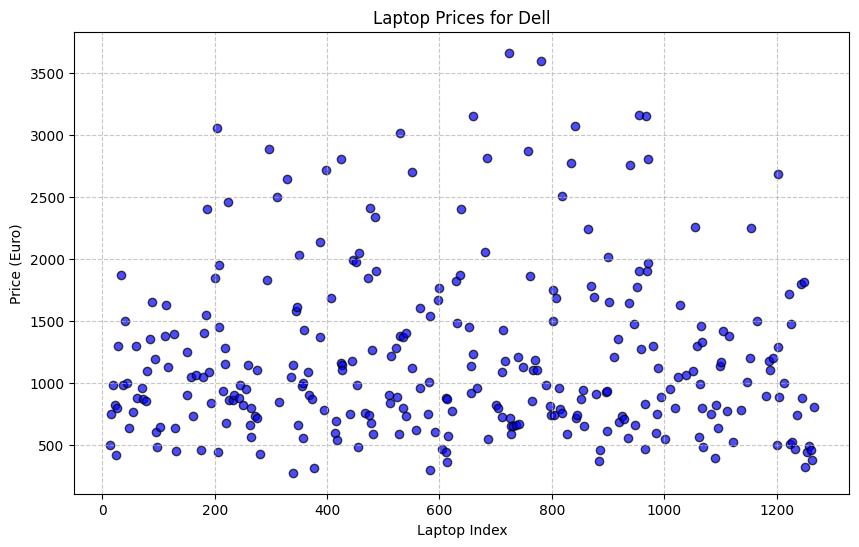

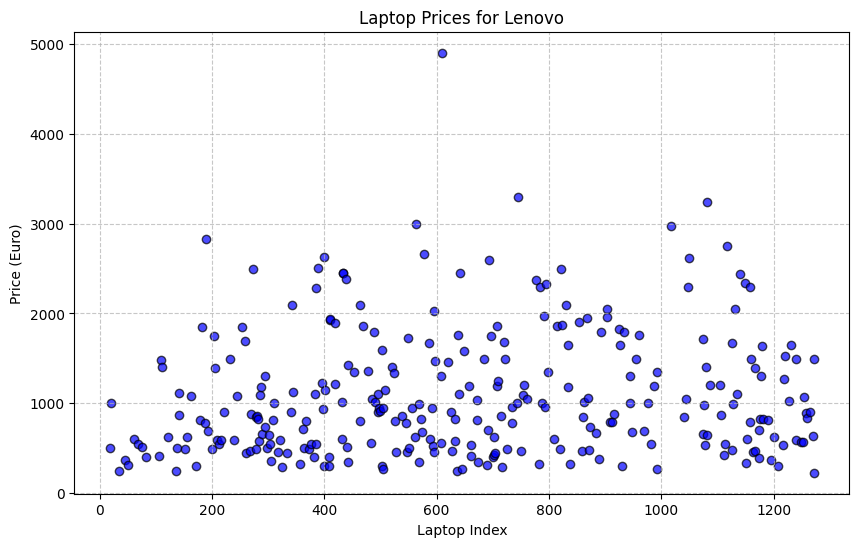

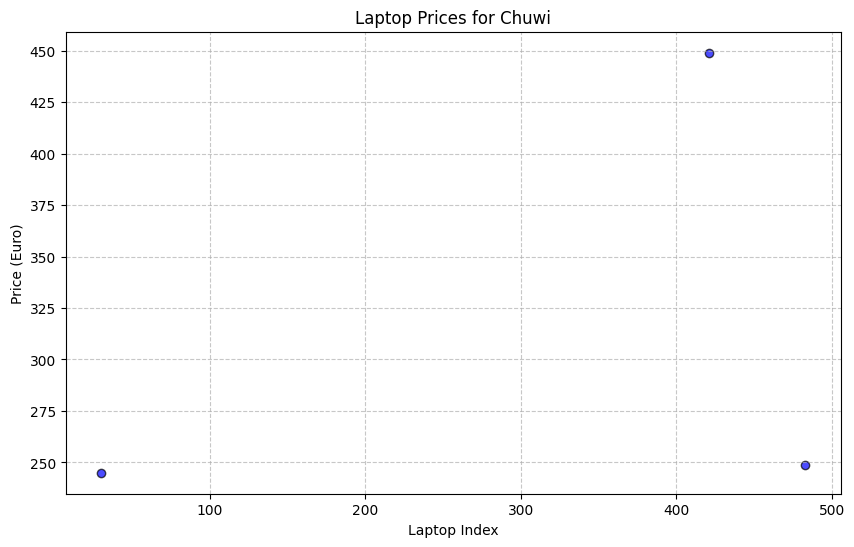

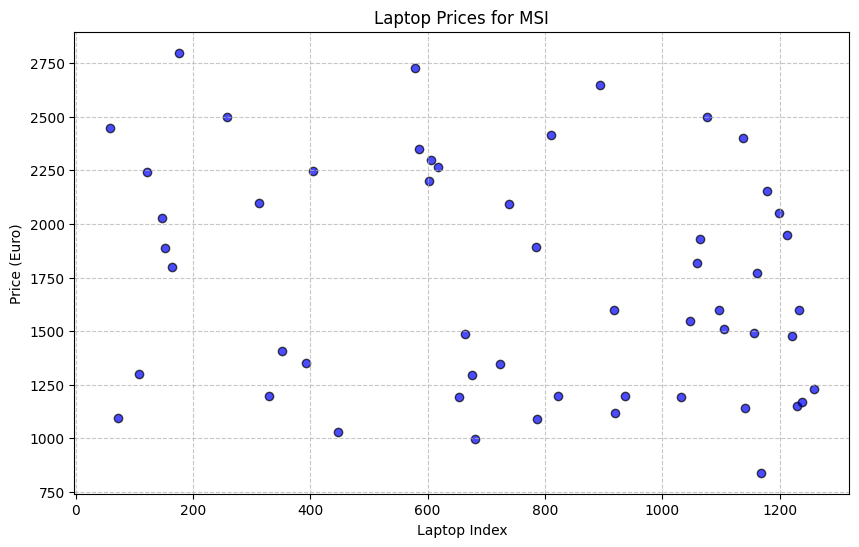

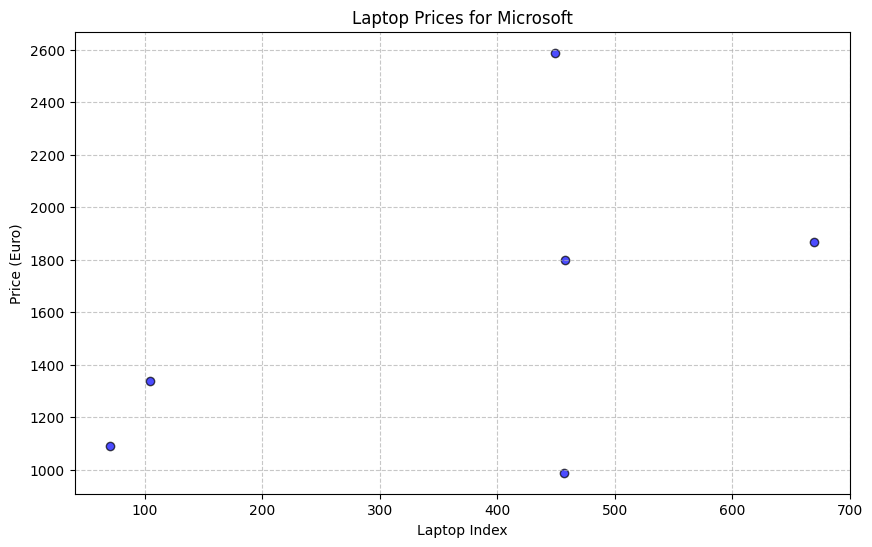

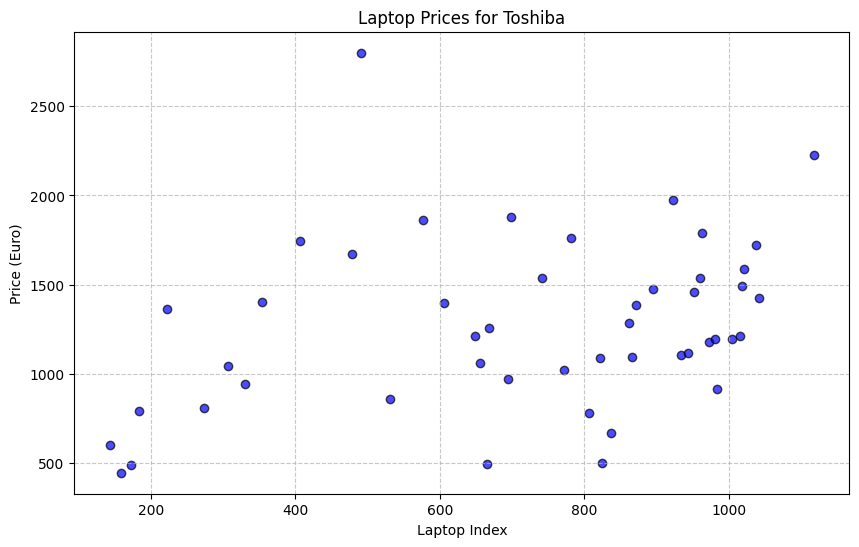

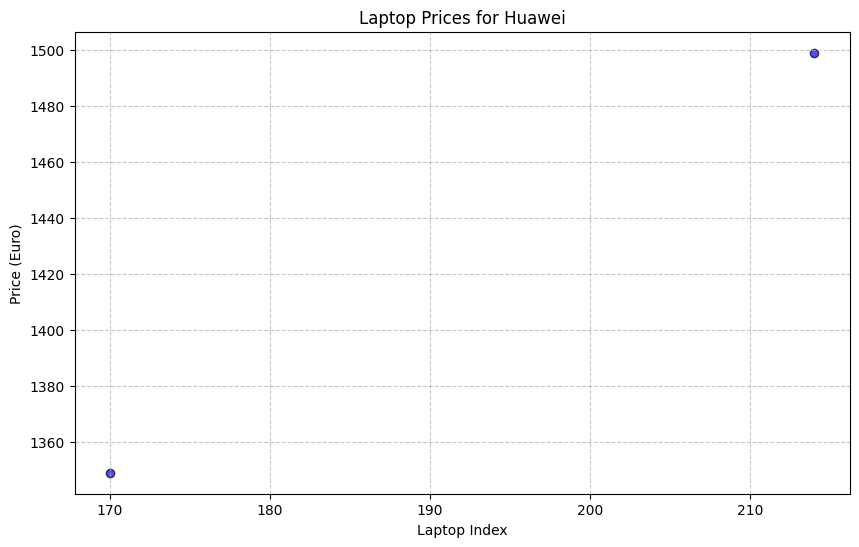

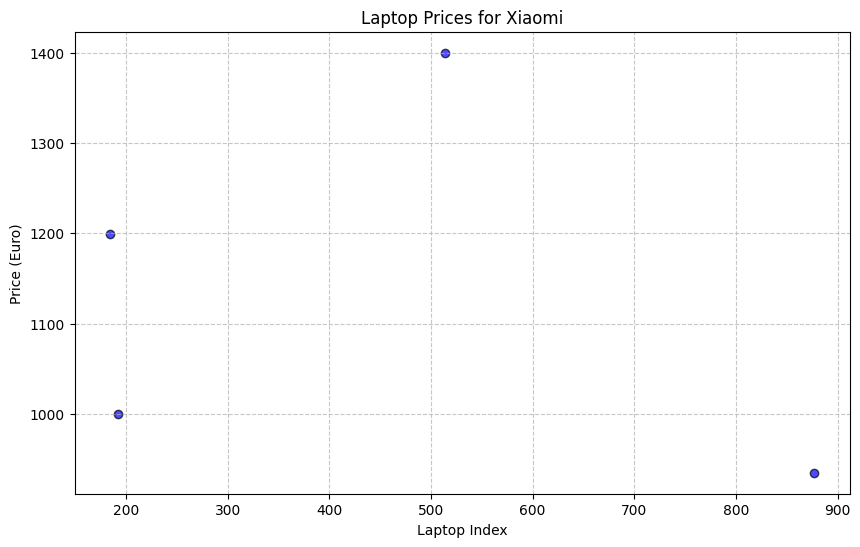

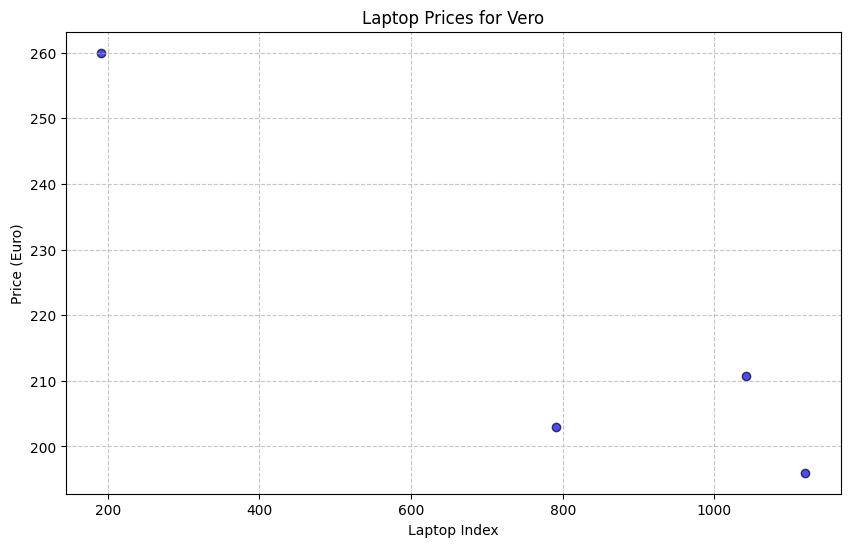

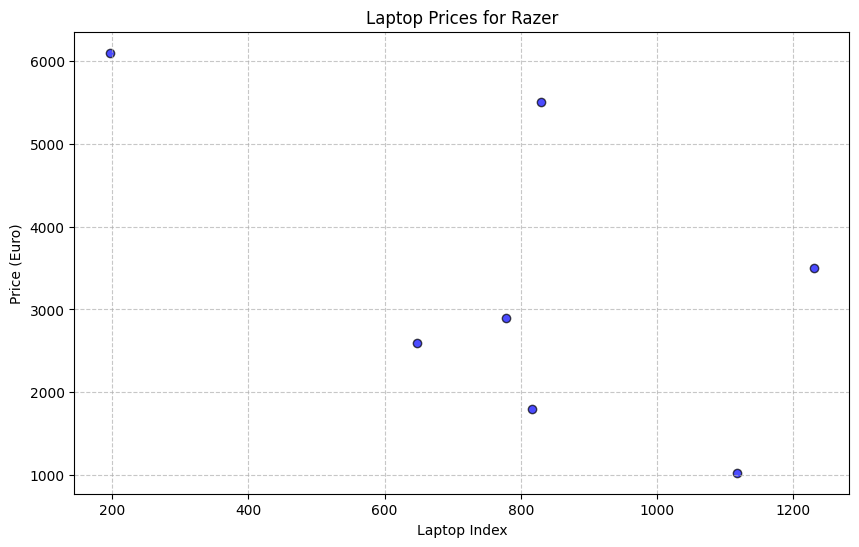

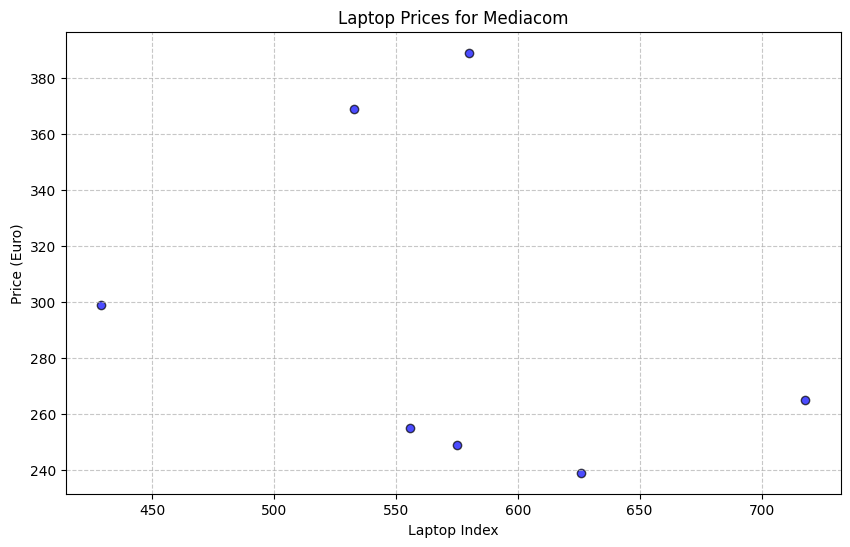

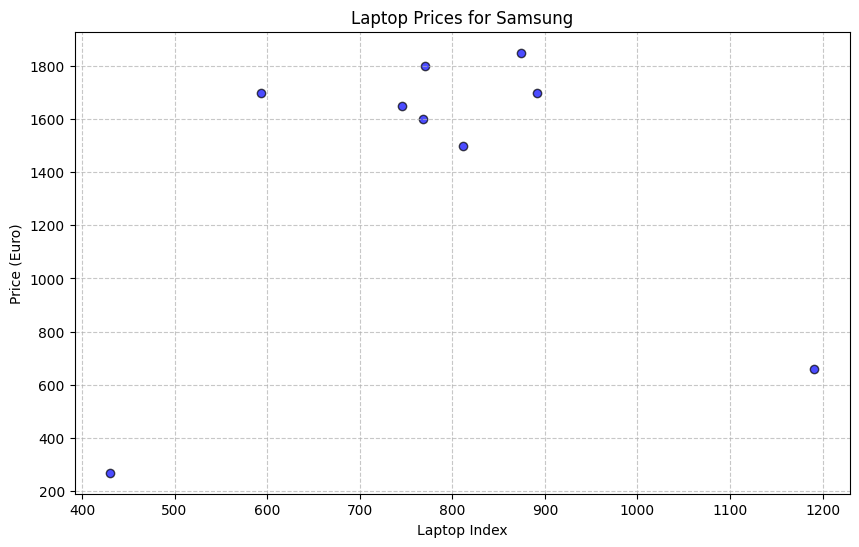

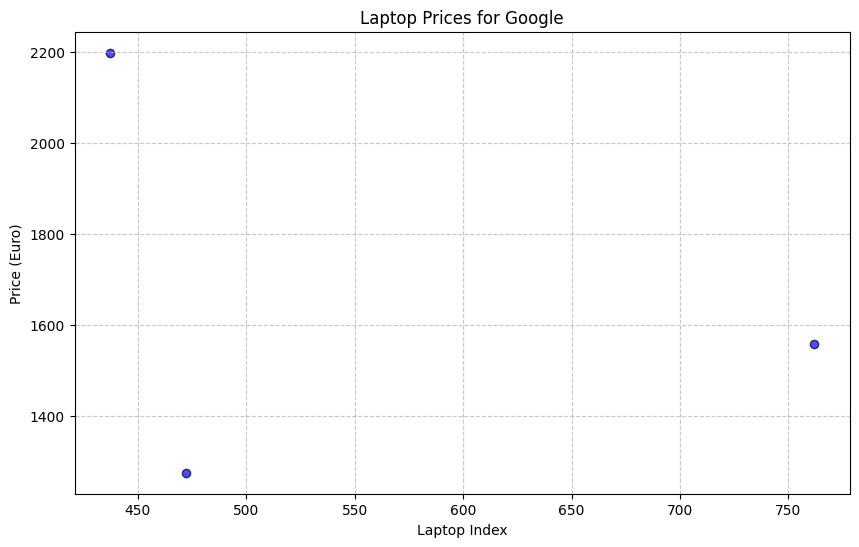

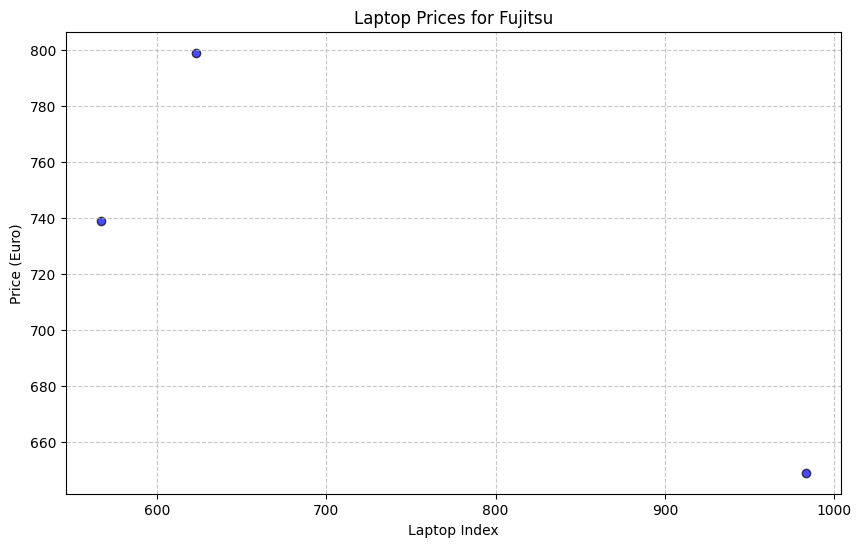

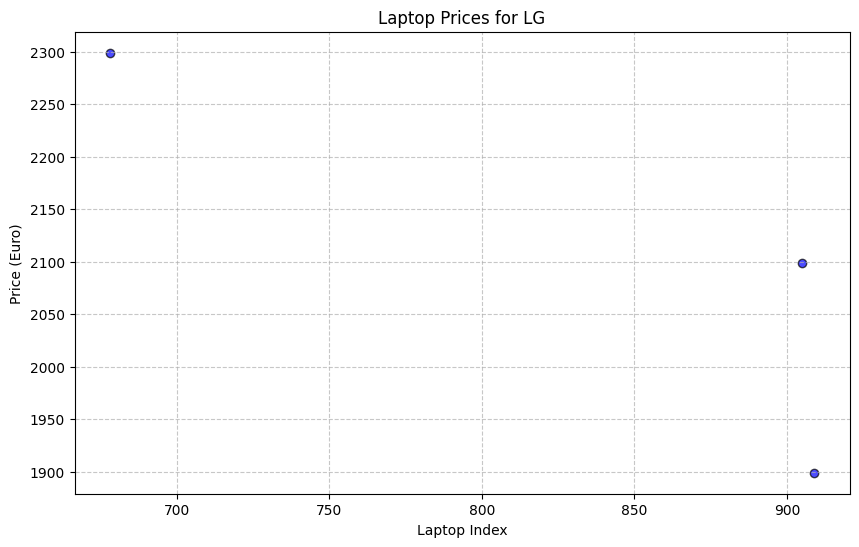

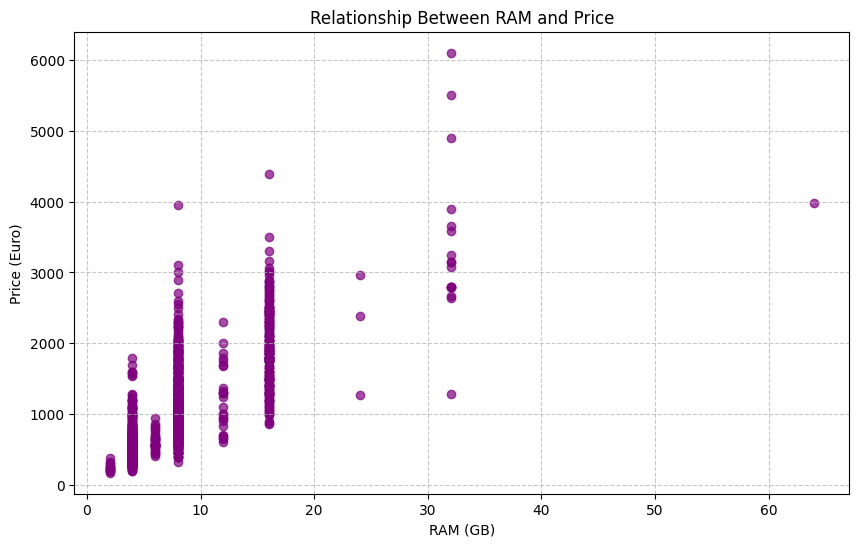

Dataframe with Storage Type Column:
                Memory   Storage Type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD
Summary of the Dataset:
            Inches  CPU_Frequency (GHz)     RAM (GB)  Weight (kg)  \
count  1275.000000          1275.000000  1275.000000  1275.000000   
mean     15.022902             2.302980     8.440784     2.040525   
std       1.429470             0.503846     5.097809     0.669196   
min      10.100000             0.900000     2.000000     0.690000   
25%      14.000000             2.000000     4.000000     1.500000   
50%      15.600000             2.500000     8.000000     2.040000   
75%      15.600000             2.700000     8.000000     2.310000   
max      18.400000             3.600000    64.000000     4.700000   

       Price (Euro)  
count   1275.000000  
mean    1134.969059  
std      700.752504  
mi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the dataset
file_path = "/Users/elianaheitner/Downloads/laptop_price - dataset.csv"  
df = pd.read_csv(file_path)

# Plot the price of all laptops
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Price (Euro)'], color='blue', alpha=0.7, edgecolor='black')
plt.title("Prices of All Laptops")
plt.xlabel("Laptop Index")
plt.ylabel("Price (Euro)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Find the company with the most expensive laptops on average
avg_price_per_company = df.groupby("Company")["Price (Euro)"].mean()
most_expensive_company = avg_price_per_company.idxmax()

print(f"Company with the most expensive laptops on average: {most_expensive_company}")
print("Average price per company:")
print(avg_price_per_company)

# Normalize Operating Systems column
df['OpSys'] = df['OpSys'].str.lower()  # Convert all to lowercase for consistency
df['OpSys'] = df['OpSys'].replace({
    "windows 10": "windows", 
    "win10": "windows",
    "mac os": "macos",
    "macosx": "macos"
})  # Normalize similar values
unique_opsys = df['OpSys'].unique()
print("Unique Operating Systems:")
print(unique_opsys)

# Generate separate plots for laptop prices grouped by company
unique_companies = df['Company'].unique()

for company in unique_companies:
    plt.figure(figsize=(10, 6))
    company_data = df[df['Company'] == company]
    plt.scatter(company_data.index, company_data['Price (Euro)'], alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Laptop Prices for {company}")
    plt.xlabel("Laptop Index")
    plt.ylabel("Price (Euro)")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
# Relationship between RAM and Price
plt.figure(figsize=(10, 6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.7, color='purple')
plt.title("Relationship Between RAM and Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euro)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Create a new column for Storage Type
df['Storage Type'] = df['Memory'].str.extract(r'(SSD|HDD|Hybrid|Flash Storage)', expand=False)
print("Dataframe with Storage Type Column:")
print(df[['Memory', 'Storage Type']].head())

# Display the summary of the dataset
print("Summary of the Dataset:")
print(df.describe())




Bonus
Question 1: Which company offers the widest price range for laptops?

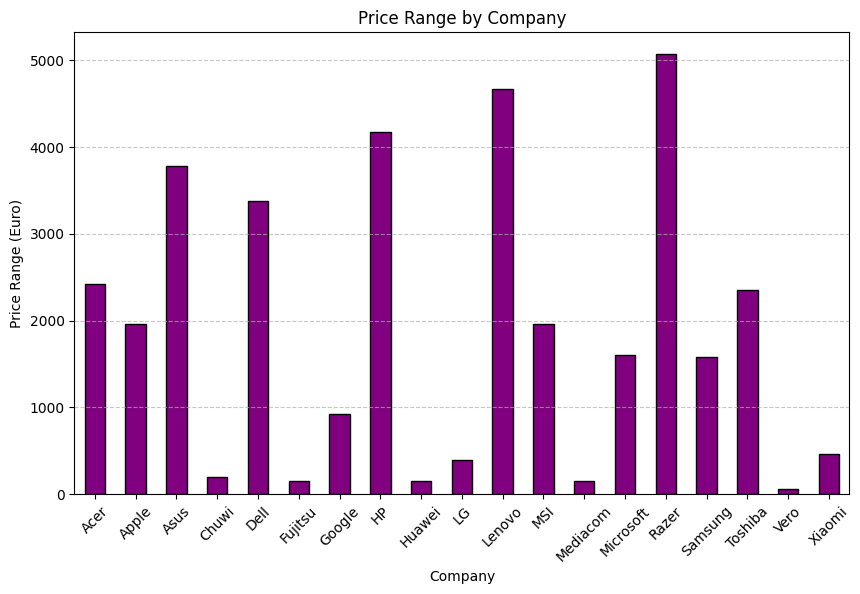

In [27]:
# Calculate price range for each company
price_range_per_company = df.groupby("Company")["Price (Euro)"].agg(lambda x: x.max() - x.min())

# Plot the price range for each company
plt.figure(figsize=(10, 6))
price_range_per_company.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Price Range by Company")
plt.xlabel("Company")
plt.ylabel("Price Range (Euro)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
pip install matplotlib
pip install numpy
pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Question 2: Are lighter laptops more expensive?


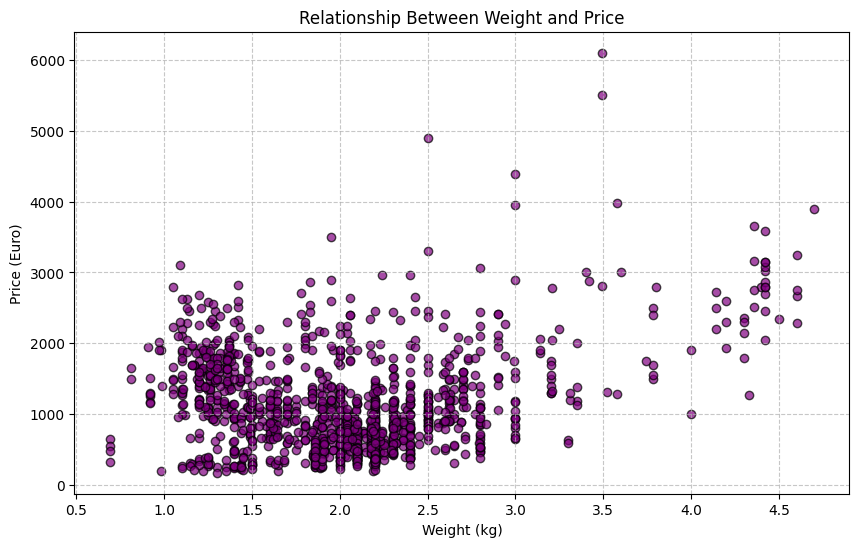

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/elianaheitner/Downloads/laptop_price - dataset.csv"  
df = pd.read_csv(file_path)

# Scatter plot for weight vs price
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight (kg)'], df['Price (Euro)'], alpha=0.7, color='purple', edgecolor='black')
plt.title("Relationship Between Weight and Price")
plt.xlabel("Weight (kg)")
plt.ylabel("Price (Euro)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


More Questions:

What is the most common screen size among laptops?

What is the average weight of laptops in the dataset?

